# Training 1 using CustomCNN

In [1]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
boltons                      23.0.0
brotlipy                     0.7.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.15.1
chardet                      4.0.0
charset-normalizer           2.0.4
chex                         0.1.85
comm                         0.2.1
conda                        23.3.1
conda-content-trust          0.1.3
conda-package-handling       2.0.2
conda_package_streaming      0.7.0
contourpy                

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

2024-01-17 10:33:00.208815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 10:33:00.367511: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-17 10:33:01.097260: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2024-01-17 10:33:01.097359: W tensorflow/c

In [2]:
from PIL import Image
import os


### Import data into tensorflow dataset object

In [3]:
train_dir = 'datasetX/trainX'
valid_dir = 'datasetX/validX'
test_dir = 'datasetX/testX'
test_dir = 'datasetX/testX'

### Split the dataset

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [ ]:
# !pip install split-folders

In [4]:
import splitfolders

In [6]:
import splitfolders
# Define the input directory containing your dataset
input_folder = "EMP_Dataset"

# Define the output directory where the split dataset will be saved
output_folder = "EMP_Dataset_Splited"

# Define the desired split ratio
split_ratio = (0.8, 0.1, 0.1)  # 80% train, 10% validation, 10% test
# Use splitfolders package to perform the split
splitfolders.ratio(input_folder, output_folder, ratio=split_ratio, seed=42)

In [7]:
# Use splitfolders package to perform the split
splitfolders.ratio(input_folder, output_folder, ratio=split_ratio, seed=42)

### Resize images of the dataset

In [ ]:
from PIL import Image
import os

#### Just Resize (old)

In [ ]:

def resize_images(input_dir, output_dir, target_size):
    os.makedirs(output_dir, exist_ok=True)
    
    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        output_class_path = os.path.join(output_dir, class_folder)
        os.makedirs(output_class_path, exist_ok=True)
        
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            output_path = os.path.join(output_class_path, filename)
            
            with Image.open(image_path) as image:
                # Calculate the new size while preserving aspect ratio
                width, height = image.size
                aspect_ratio = width / height
                if aspect_ratio > 1:
                    new_width = target_size
                    new_height = int(target_size / aspect_ratio)
                else:
                    new_width = int(target_size * aspect_ratio)
                    new_height = target_size
                
                # Resize the image and save it
                resized_image = image.resize((new_width, new_height))
                resized_image.save(output_path)

# Example usage
input_directory = "training_dataset_2_splited/train"  # Path to your train partition
output_directory = "training_dataset_2_splited_resized/train"  # Path to the output directory
target_size = 256

resize_images(input_directory, output_directory, target_size)

In [ ]:
# Example usage
input_directory = "training_dataset_2_splited/test"  # Path to your train partition
output_directory = "training_dataset_2_splited_resized/test"  # Path to the output directory
target_size = 256

resize_images(input_directory, output_directory, target_size)

In [ ]:
# Example usage
input_directory = "training_dataset_2_splited/val"  # Path to your train partition
output_directory = "training_dataset_2_splited_resized/val"  # Path to the output directory
target_size = 256

resize_images(input_directory, output_directory, target_size)

#### Resize while preserving aspect ratio

In [9]:
from PIL import Image
import os

def resize_and_crop_images(input_dir, output_dir, target_size):
    os.makedirs(output_dir, exist_ok=True)
    
    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        output_class_path = os.path.join(output_dir, class_folder)
        os.makedirs(output_class_path, exist_ok=True)
        
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            output_path = os.path.join(output_class_path, filename)
            
            with Image.open(image_path) as image:
                # Resize while preserving aspect ratio
                width, height = image.size
                aspect_ratio = width / height
                if aspect_ratio > 1:
                    new_width = target_size
                    new_height = int(target_size / aspect_ratio)
                else:
                    new_width = int(target_size * aspect_ratio)
                    new_height = target_size
                
                resized_image = image.resize((new_width, new_height))
                
                # Create a square canvas and paste the resized image in the center
                canvas = Image.new('RGB', (target_size, target_size), (0, 0, 0))
                x = (target_size - new_width) // 2
                y = (target_size - new_height) // 2
                canvas.paste(resized_image, (x, y))
                
                # Save the resized and cropped image
                canvas.save(output_path)

# For Train dataset
input_directory = "EMP_Dataset_Splited/train"  # Path to your train partition
output_directory = "EMP_Dataset_Splited_ResizedX/train"  # Path to the output directory
target_size = 299

resize_and_crop_images(input_directory, output_directory, target_size)

In [10]:
# For Test dataset
input_directory = "EMP_Dataset_Splited/test"  # Path to your train partition
output_directory = "EMP_Dataset_Splited_ResizedX/test"  # Path to the output directory
target_size = 299

resize_and_crop_images(input_directory, output_directory, target_size)

In [13]:
# For Valdation dataset
input_directory = "EMP_Dataset_Splited/val"  # Path to your train partition
output_directory = "EMP_Dataset_Splited_ResizedX/val"  # Path to the output directory
target_size = 299

resize_and_crop_images(input_directory, output_directory, target_size)

### Data Augmentation and Normalization

In [4]:
from PIL import Image
import os

In [5]:
# Define image dimensions and batch size
image_size = (299, 299)
batch_size = 32
CHANNELS = 3

In [6]:
# Data augmentation and preprocessing for the training and validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2, # Randomly zooms the images by 20%
    shear_range=0.2, # Applies shear transformation with a shear angle of 20 degrees
    width_shift_range=0.1, # Randomly shifts the images horizontally by 10% of the width
    height_shift_range=0.1,  # Randomly shifts the images vertically by 10% of the height
    brightness_range=[0.8, 1.2],  # Randomly adjusts brightness by a factor between 0.8 and 1.2
    contrast_range=[0.8, 1.2]  # Randomly adjusts contrast by a factor between 0.8 and 1.2
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2], 
    contrast_range=[0.8, 1.2]  
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 13626 images belonging to 56 classes.
Found 1667 images belonging to 56 classes.


In [ ]:
train_generator.class_indices

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

In [11]:
import scipy

In [12]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break
    #     print(label_batch)
    # print(image_batch[0])
#     count+=1
#     if count>2:
#         break

(32, 299, 299, 3)


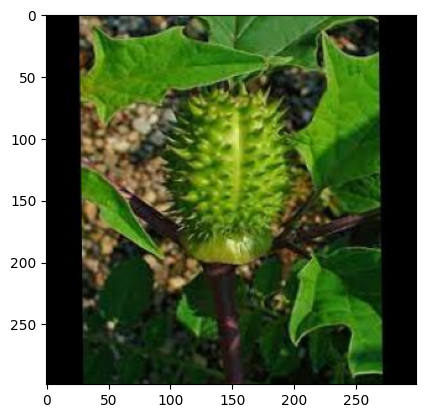

In [14]:
count = 0
for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.show()
    break

## Building the Model

In [17]:
# Define the custom-built model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
num_classes = 56

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

2024-01-17 10:34:21.974092: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2024-01-17 10:34:21.974872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1378 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-01-17 10:34:21.975412: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 398 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-01-17 10:34:21.975990: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 1380 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090, pc

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 256)       295168    
                                                                 
 global_average_pooling2d (G  (None, 256)              0

### Compiling the Model
We use `adam` Optimizer with learning rate of `0.001`, `CategoricalCrossentropy` for losses, `accuracy, precision, recall` as a metric

In [20]:
# Compile the model
from tensorflow.keras.metrics import Precision, Recall

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=METRICS)

In [21]:
13626/32

425.8125

In [22]:
1667/32

52.09375

In [23]:
batch_size=32

In [29]:
# Training process
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/100


2024-01-17 03:48:54.153339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2024-01-17 03:48:54.993898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


425/425 [==============================] - 214s 492ms/step - loss: 3.7312 - accuracy: 0.0653 - precision: 0.3488 - recall: 0.0033 - val_loss: 3.3679 - val_accuracy: 0.1298 - val_precision: 0.7500 - val_recall: 0.0144
Epoch 2/100
425/425 [==============================] - 208s 489ms/step - loss: 3.2601 - accuracy: 0.1481 - precision: 0.5274 - recall: 0.0191 - val_loss: 3.1751 - val_accuracy: 0.1707 - val_precision: 0.4921 - val_recall: 0.0186
Epoch 3/100
425/425 [==============================] - 205s 482ms/step - loss: 3.0530 - accuracy: 0.1924 - precision: 0.5861 - recall: 0.0323 - val_loss: 2.9376 - val_accuracy: 0.2212 - val_precision: 0.5905 - val_recall: 0.0373
Epoch 4/100
425/425 [==============================] - 208s 489ms/step - loss: 2.8465 - accuracy: 0.2400 - precision: 0.6143 - recall: 0.0504 - val_loss: 2.7312 - val_accuracy: 0.2879 - val_precision: 0.7795 - val_recall: 0.0595
Epoch 5/100
425/425 [==============================] - 208s 488ms/step - loss: 2.6634 - accuracy

In [26]:
# Data augmentation and preprocessing for the test set

test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      horizontal_flip=True,
      zoom_range=0.2,
      shear_range=0.2,
      width_shift_range=0.1,
      height_shift_range=0.1
      brightness_range=[0.8, 1.2], 
      contrast_range=[0.8, 1.2] 

)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode= 'categorical'
)


Found 1738 images belonging to 56 classes.


In [27]:
#new
scores = model.evaluate(test_generator)

55/55 [==============================] - 46s 828ms/step - loss: 1.5213 - accuracy: 0.7031 - precision: 0.7846 - recall: 0.6496


In [28]:
scores

[1.521289587020874, 0.7031069993972778, 0.7845726013183594, 0.6495972275733948]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [29]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [30]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 425}

In [31]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 425}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])

100

In [35]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.784205436706543,
 3.3916571140289307,
 3.1954216957092285,
 3.054598093032837,
 2.9155709743499756]

In [36]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.784205436706543,
 3.3916571140289307,
 3.1954216957092285,
 3.054598093032837,
 2.9155709743499756]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

pre = history.history['precision']
val_pre = history.history['val_precision']

rec = history.history['recall']
val_rec = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [38]:
acc

[0.05693688243627548,
 0.1211029440164566,
 0.16374871134757996,
 0.1935412734746933,
 0.22995439171791077,
 0.25856995582580566,
 0.2839488089084625,
 0.3059437870979309,
 0.3338237404823303,
 0.35155215859413147,
 0.37192878127098083,
 0.3839929401874542,
 0.4012799859046936,
 0.4149624705314636,
 0.42813006043434143,
 0.4425481855869293,
 0.4498308002948761,
 0.4676327705383301,
 0.484184205532074,
 0.49411505460739136,
 0.503604531288147,
 0.5096365809440613,
 0.5328086018562317,
 0.5360453128814697,
 0.5475209355354309,
 0.5598058104515076,
 0.5640723705291748,
 0.5784169435501099,
 0.5745181441307068,
 0.5906282067298889,
 0.6003383994102478,
 0.6040900349617004,
 0.6133588552474976,
 0.6280711889266968,
 0.6272620558738708,
 0.6347653269767761,
 0.6418272852897644,
 0.6494777202606201,
 0.6608797907829285,
 0.6638222932815552,
 0.6669854521751404,
 0.677946150302887,
 0.6815506815910339,
 0.681182861328125,
 0.6894953846931458,
 0.7011029124259949,
 0.6972193717956543,
 0.700456

In [39]:
val_acc

[0.09495192021131516,
 0.16105769574642181,
 0.17848557233810425,
 0.23617789149284363,
 0.28004807233810425,
 0.29567307233810425,
 0.32632210850715637,
 0.33713942766189575,
 0.37920671701431274,
 0.3900240361690521,
 0.3912259638309479,
 0.4032451808452606,
 0.42007210850715637,
 0.43930289149284363,
 0.453125,
 0.46274039149284363,
 0.4693509638309479,
 0.4819711446762085,
 0.47235578298568726,
 0.48257210850715637,
 0.484375,
 0.5102163553237915,
 0.5132211446762085,
 0.5276442170143127,
 0.5570913553237915,
 0.5408653616905212,
 0.5528846383094788,
 0.5727163553237915,
 0.5588942170143127,
 0.5847355723381042,
 0.5691105723381042,
 0.5775240659713745,
 0.5799278616905212,
 0.5949519276618958,
 0.5979567170143127,
 0.59375,
 0.5961538553237915,
 0.6111778616905212,
 0.6177884340286255,
 0.614182710647583,
 0.612379789352417,
 0.629807710647583,
 0.6286057829856873,
 0.6322115659713745,
 0.6382211446762085,
 0.6105769276618958,
 0.6334134340286255,
 0.6502403616905212,
 0.642427861

In [40]:
 predictions = model.predict(test_generator)

55/55 [==============================] - 40s 714ms/step


In [41]:
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [42]:
predicted_labels = np.argmax(predictions, axis=1)

In [43]:
true_labels = test_generator.classes

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
metrics = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
print("Precision:", metrics[0])
print("Recall:", metrics[1])
print("F1-score:", metrics[2])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

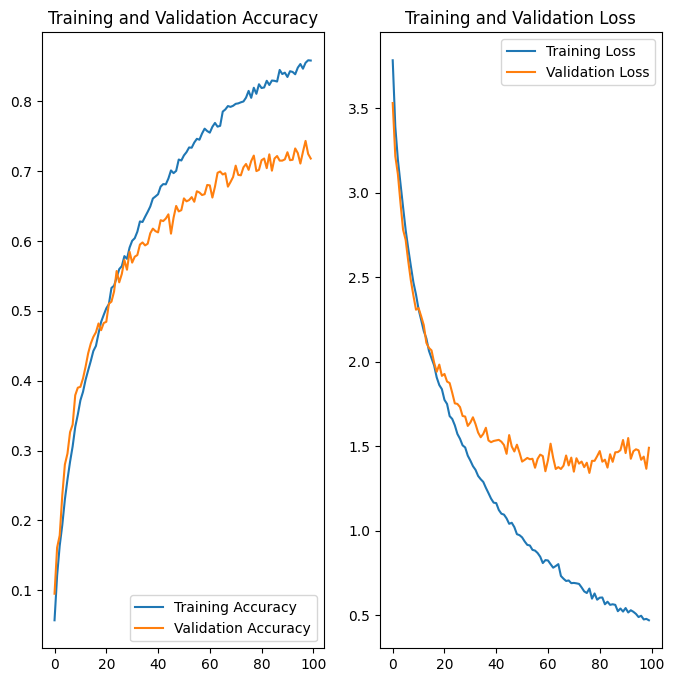

In [46]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

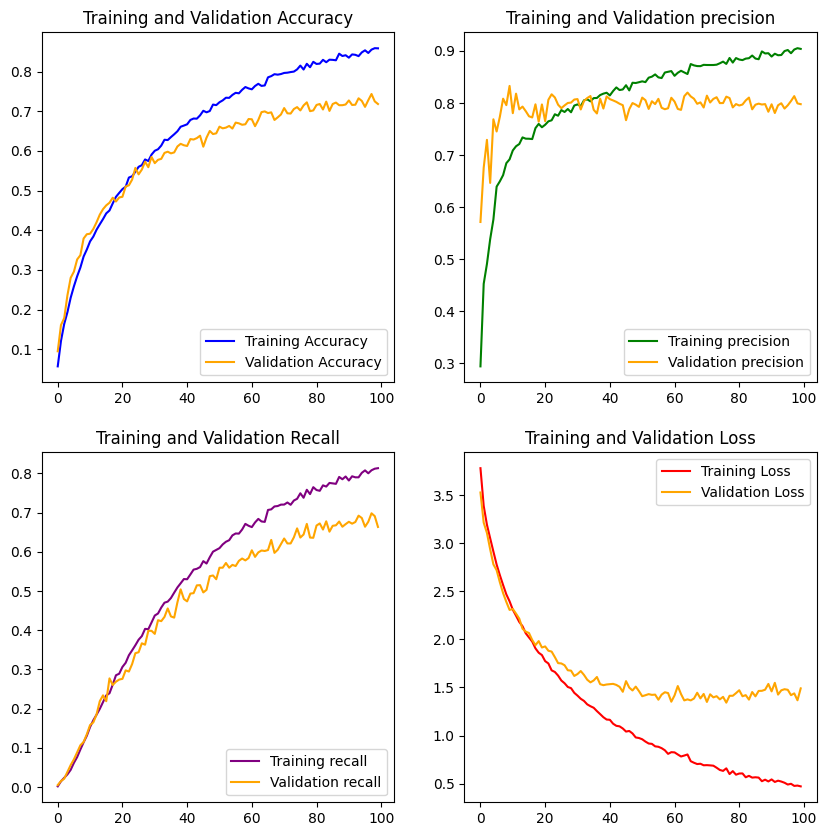

In [47]:
import matplotlib.pyplot as plt
EPOCHS = 100
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), pre, label='Training precision', color='green')
plt.plot(range(EPOCHS), val_pre, label='Validation precision', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation precision')

plt.subplot(2, 2, 3)
plt.plot(range(EPOCHS), rec, label='Training recall', color='purple')
plt.plot(range(EPOCHS), val_rec, label='Validation recall', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(2, 2, 4)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='red')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual label: Thymus capitatus
1/1 [==============================] - 0s 195ms/step
Predicted label: Thymus capitatus


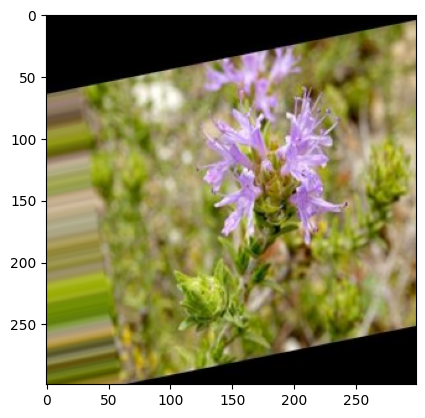

In [48]:
import numpy as np

for images_batch, labels_batch in test_generator:
   
    first_image = images_batch[0]
    first_label = np.argmax(labels_batch[0])  # Use np.argmax to get the class index

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_predictions = model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_predictions[0])]  # Use np.argmax for categorical class mode
    print("Predicted label:", predicted_label)

    break

### Write a function for inference

1/1 [==============================] - 0s 25ms/step


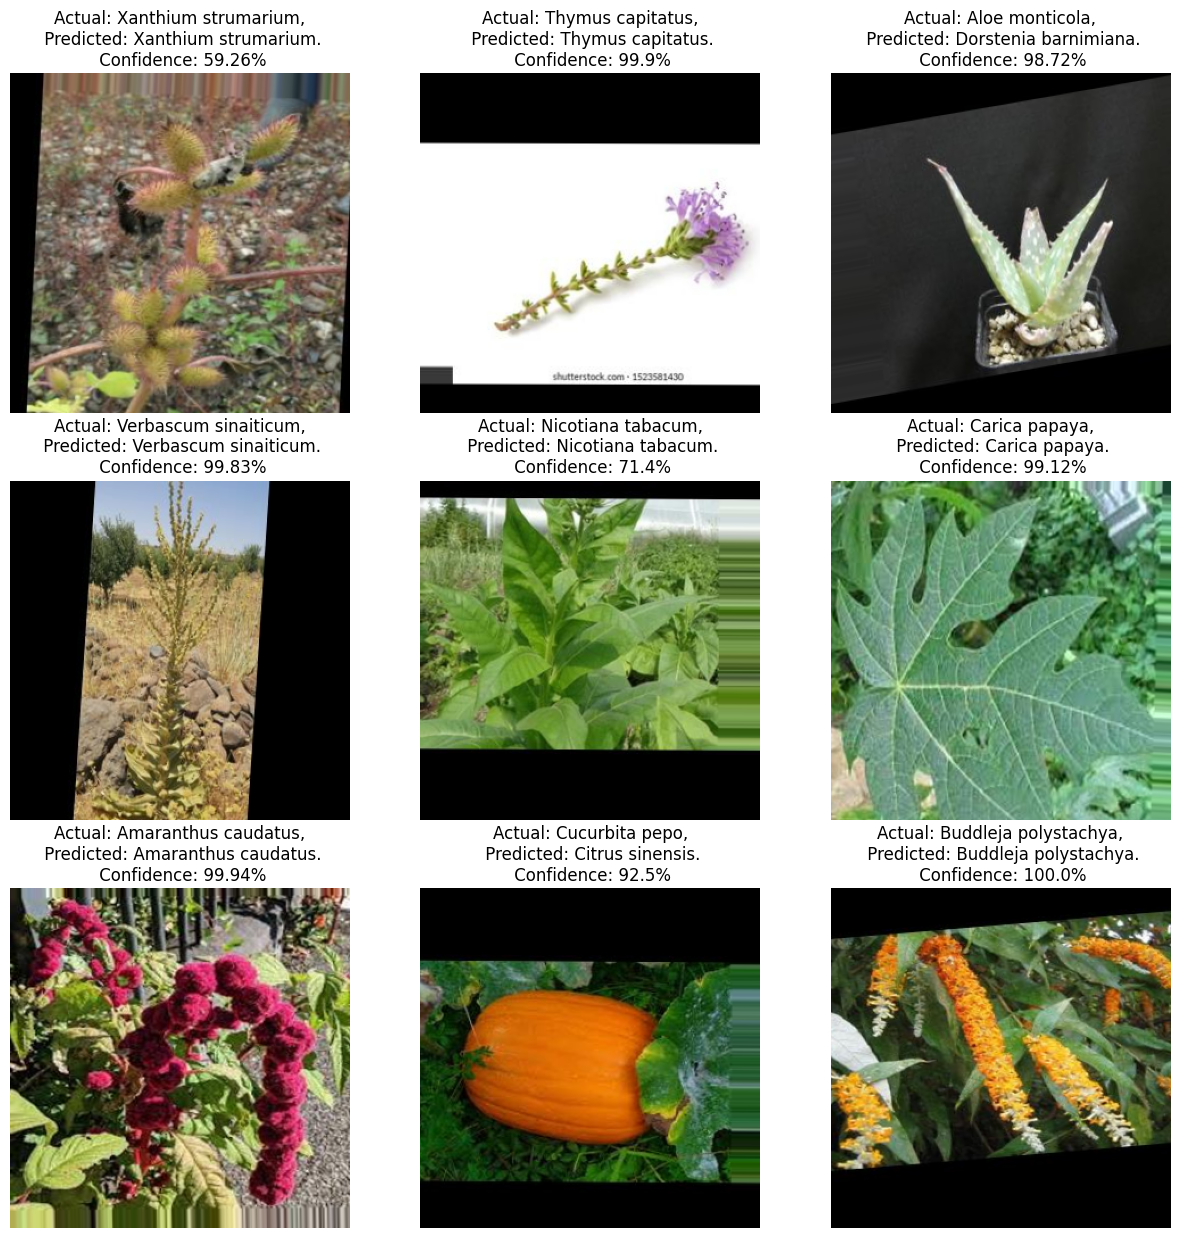

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 29ms/step


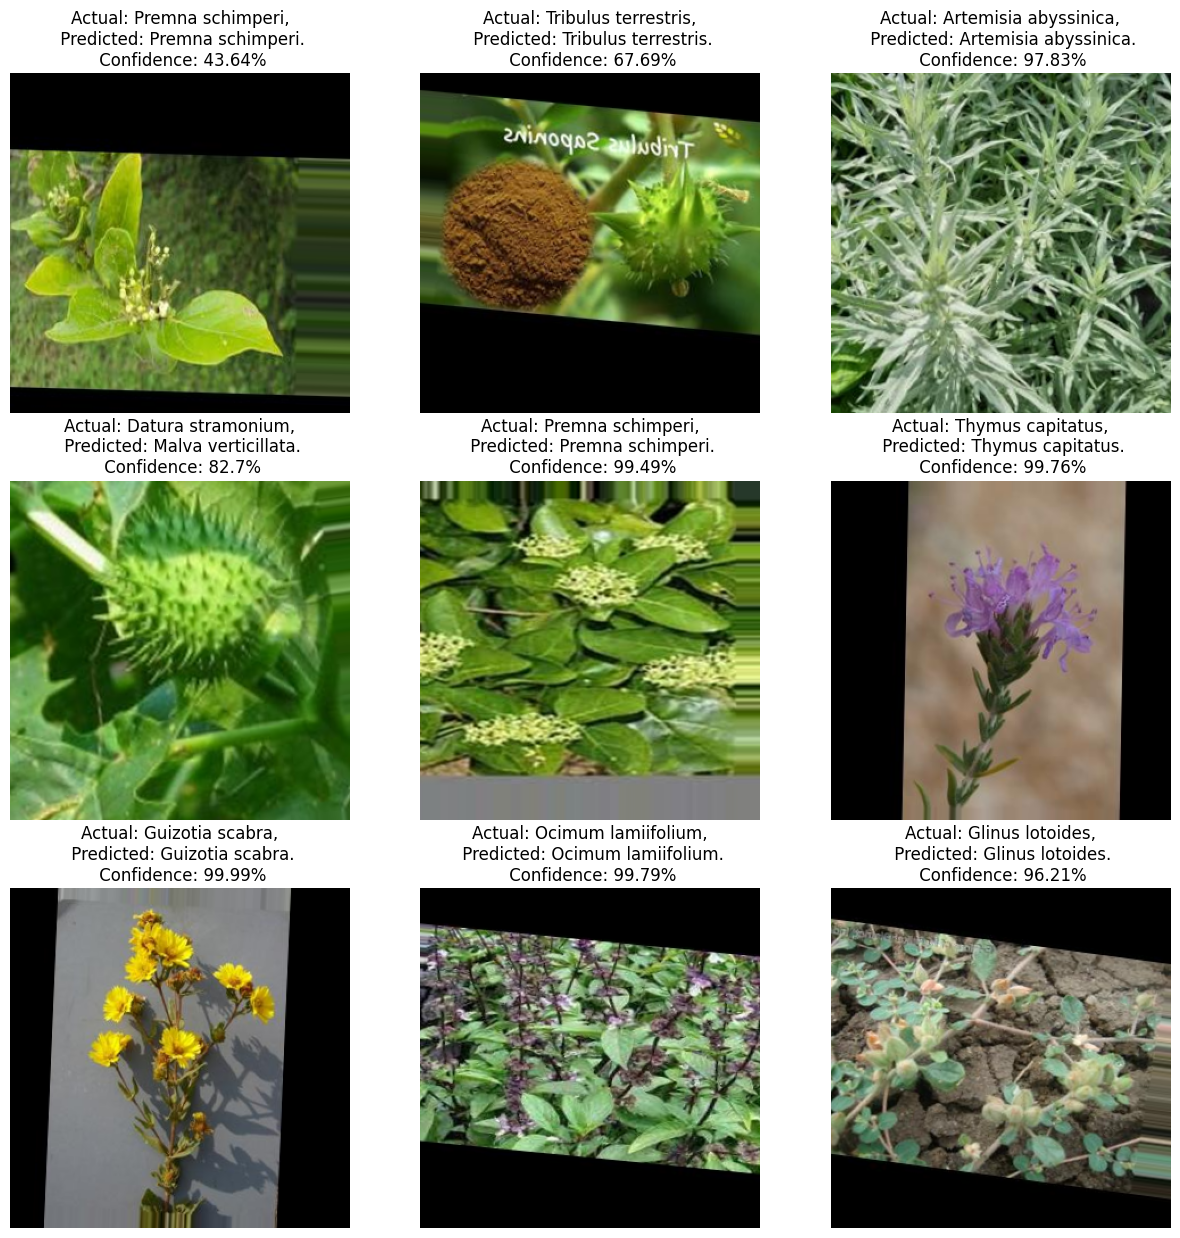

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 44ms/step


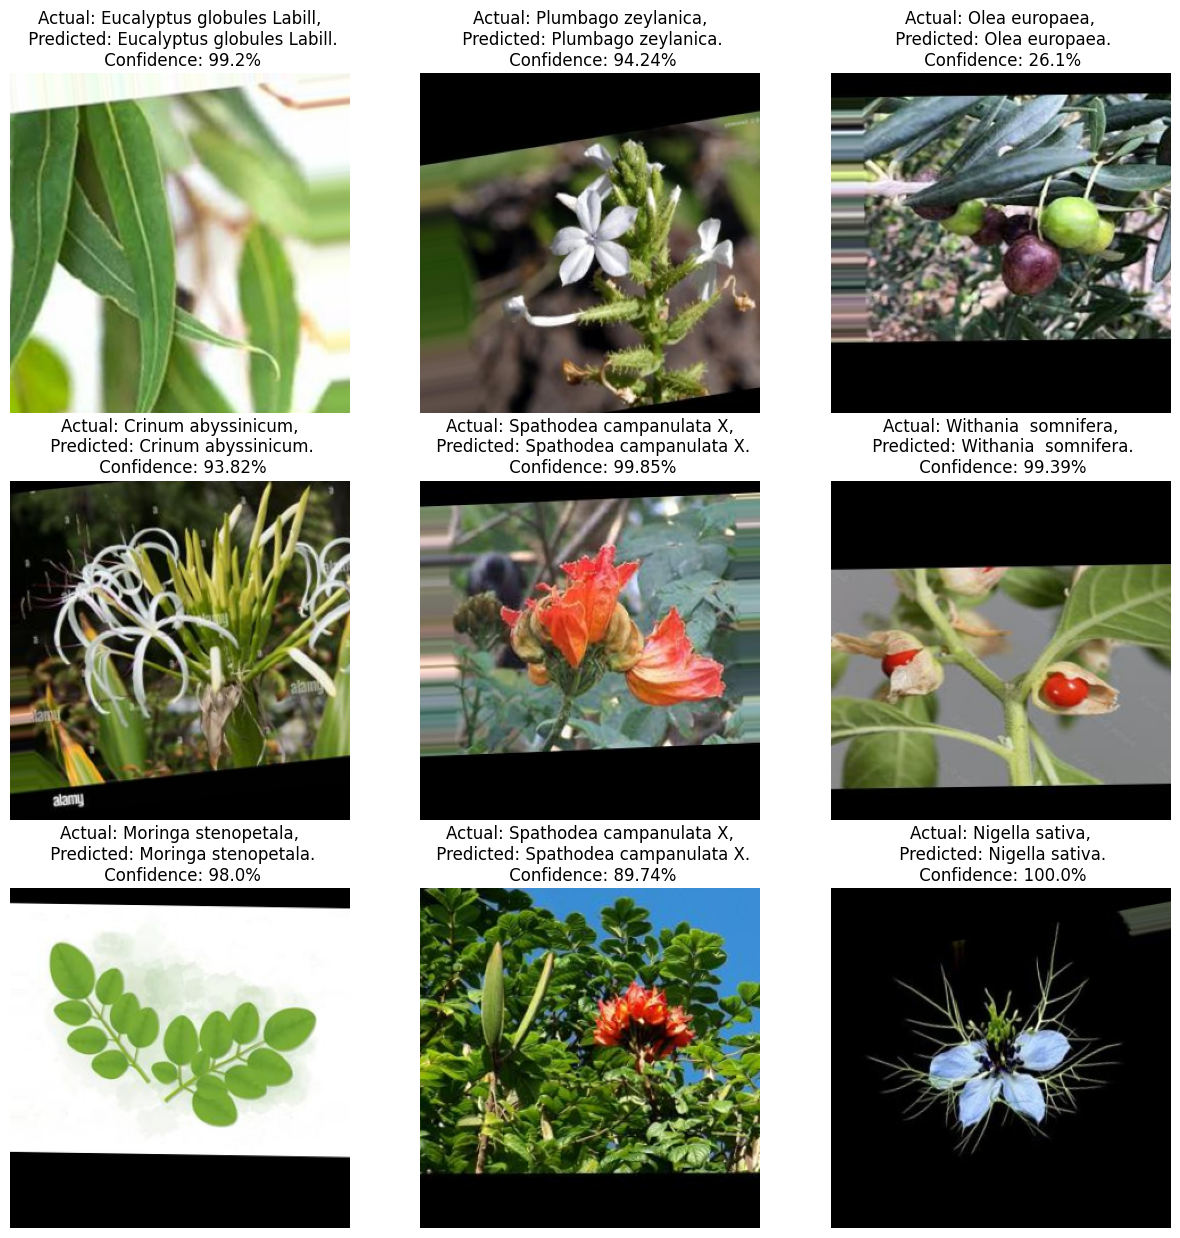

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [57]:
model.save("saved_models/TrainedModel1_CNN_Final.h5")

In [58]:
model.save("saved_models/TrainedModel1_CNN_Final.keras")

In [59]:
# import os
# model_version=max([int(i) for i in os.listdir("saved_modelCNN/CustomCNNXX") + [0]])+1
# model.save(f"saved_modelCNN/CustomCNN{model_version}")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("saved_models/TrainedModel1_CNN_Final.tflite", 'wb') as f:
  f.write(tflite_model)